In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
# Read dataset file
df = pd.read_csv('VCB.csv')
df = df[['Price']]
df = df.dropna()
df

,Price
0,43216
1,44960
2,44429
3,44808
4,44505
...,...
1237,91700
1238,92600
1239,92800
1240,95000


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Normalize the data
mean = train_data.mean()
meant = test_data.mean()
meanv = val_data.mean()
std = train_data.std()
stdt = test_data.std()
stdv = val_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - meant) / stdt
val_data = (val_data - meanv) / stdv

In [5]:
# Prepare the data for CNN
window_size = 10

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data.values, window_size)
X_test, y_test = create_sequences(test_data.values, window_size)
X_val, y_val = create_sequences(val_data.values, window_size)


In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
27/27 [==============================] - 2s 15ms/step - loss: 0.3568 - val_loss: 0.2334
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0355 - val_loss: 0.1682
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.1412
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0232 - val_loss: 0.1253
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.1109
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0181 - val_loss: 0.1122
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0984
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.0954
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.0887
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.0917
Epoch 11

27/27 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0713
Epoch 84/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.0740
Epoch 85/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0726
Epoch 86/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0715
Epoch 87/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0740
Epoch 88/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0762
Epoch 89/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0085 - val_loss: 0.0723
Epoch 90/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0753
Epoch 91/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.0715
Epoch 92/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0727
Epoch 93/100


In [8]:
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions
y_pred = y_pred * pd.Series(stdt).values[0] + pd.Series(meant).values[0]

8/8 [==============================] - 0s 2ms/step


In [9]:
# Make predictions
y_vpred = model.predict(X_val)
# Inverse transform the predictions
y_vpred = y_vpred * pd.Series(stdv).values[0] + pd.Series(meanv).values[0]

4/4 [==============================] - 0s 3ms/step


In [10]:
df

,Price
0,43216
1,44960
2,44429
3,44808
4,44505
...,...
1237,91700
1238,92600
1239,92800
1240,95000


In [11]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# re make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
# re make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 8220.36642720023
Testing RMSE: 7875.019058537578
Validation MAPE: 7.559596136008088
Testing MAPE: 7.97735768426037
Validation MAE: 6368.5345483695655
Testing MAE: 6239.023911089133


In [12]:
y_val

array([75000, 75100, 76500, 76500, 75000, 73500, 73500, 73000, 73100,
       76700, 79800, 81000, 80000, 85000, 85000, 80000, 78500, 77000,
       77300, 77400, 78200, 78800, 79500, 79700, 79200, 79000, 78700,
       79300, 79100, 78900, 79100, 80000, 80700, 80000, 82600, 82800,
       84000, 84000, 86900, 87300, 85100, 84800, 85800, 87300, 89400,
       90000, 93000, 93000, 89900, 91900, 89100, 90600, 93000, 96000,
       92000, 94200, 93000, 94500, 93500, 92500, 93000, 92400, 93000,
       93800, 94200, 93000, 93300, 93500, 92800, 93500, 93000, 93200,
       90900, 91000, 91900, 92200, 93000, 92100, 91500, 91000, 91400,
       91000, 89000, 85100, 86500, 89000, 90700, 89000, 91000, 91800,
       92300, 92700, 91400, 92800, 92000, 92100, 91200, 90000, 89000,
       88200, 88300, 88200, 88400, 88400, 88000, 88500, 88300, 87500,
       87900, 88300, 89400, 90000, 90500, 88500, 89800, 93000, 92300,
       92000, 91000, 92800, 91700, 92600, 92800, 95000, 94200],
      dtype=int64)

In [13]:
y_vpred

array([[75025.72 ],
       [78926.875],
       [81085.17 ],
       [80626.945],
       [82772.01 ],
       [85568.05 ],
       [82225.14 ],
       [78600.56 ],
       [77826.94 ],
       [78228.98 ],
       [77811.61 ],
       [77174.74 ],
       [78663.84 ],
       [79823.73 ],
       [80153.33 ],
       [79799.555],
       [79174.664],
       [79039.68 ],
       [79262.805],
       [79314.76 ],
       [78894.37 ],
       [79071.35 ],
       [79877.625],
       [80755.51 ],
       [80538.984],
       [81180.805],
       [83008.96 ],
       [83429.42 ],
       [84358.266],
       [85793.87 ],
       [87365.695],
       [86338.016],
       [84254.8  ],
       [85507.92 ],
       [87398.8  ],
       [89034.31 ],
       [89888.67 ],
       [91912.19 ],
       [92828.8  ],
       [91185.32 ],
       [90607.64 ],
       [90699.15 ],
       [89890.54 ],
       [93387.2  ],
       [94652.69 ],
       [93761.1  ],
       [92298.89 ],
       [94336.75 ],
       [94882.93 ],
       [94669.26 ],


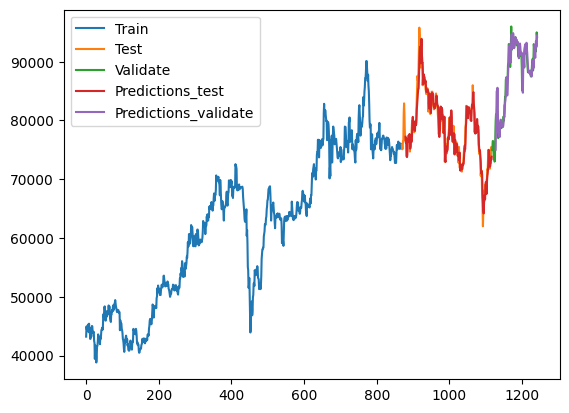

In [14]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index[-len(y_pred):], y_pred)
plt.plot(val_data.index[-len(y_vpred):], y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()

In [15]:
y_val

array([75000, 75100, 76500, 76500, 75000, 73500, 73500, 73000, 73100,
       76700, 79800, 81000, 80000, 85000, 85000, 80000, 78500, 77000,
       77300, 77400, 78200, 78800, 79500, 79700, 79200, 79000, 78700,
       79300, 79100, 78900, 79100, 80000, 80700, 80000, 82600, 82800,
       84000, 84000, 86900, 87300, 85100, 84800, 85800, 87300, 89400,
       90000, 93000, 93000, 89900, 91900, 89100, 90600, 93000, 96000,
       92000, 94200, 93000, 94500, 93500, 92500, 93000, 92400, 93000,
       93800, 94200, 93000, 93300, 93500, 92800, 93500, 93000, 93200,
       90900, 91000, 91900, 92200, 93000, 92100, 91500, 91000, 91400,
       91000, 89000, 85100, 86500, 89000, 90700, 89000, 91000, 91800,
       92300, 92700, 91400, 92800, 92000, 92100, 91200, 90000, 89000,
       88200, 88300, 88200, 88400, 88400, 88000, 88500, 88300, 87500,
       87900, 88300, 89400, 90000, 90500, 88500, 89800, 93000, 92300,
       92000, 91000, 92800, 91700, 92600, 92800, 95000, 94200],
      dtype=int64)

In [16]:
y_vpred

array([[75025.72 ],
       [78926.875],
       [81085.17 ],
       [80626.945],
       [82772.01 ],
       [85568.05 ],
       [82225.14 ],
       [78600.56 ],
       [77826.94 ],
       [78228.98 ],
       [77811.61 ],
       [77174.74 ],
       [78663.84 ],
       [79823.73 ],
       [80153.33 ],
       [79799.555],
       [79174.664],
       [79039.68 ],
       [79262.805],
       [79314.76 ],
       [78894.37 ],
       [79071.35 ],
       [79877.625],
       [80755.51 ],
       [80538.984],
       [81180.805],
       [83008.96 ],
       [83429.42 ],
       [84358.266],
       [85793.87 ],
       [87365.695],
       [86338.016],
       [84254.8  ],
       [85507.92 ],
       [87398.8  ],
       [89034.31 ],
       [89888.67 ],
       [91912.19 ],
       [92828.8  ],
       [91185.32 ],
       [90607.64 ],
       [90699.15 ],
       [89890.54 ],
       [93387.2  ],
       [94652.69 ],
       [93761.1  ],
       [92298.89 ],
       [94336.75 ],
       [94882.93 ],
       [94669.26 ],
